#                     prediction using supervised machine learning

 ### Predict the percentage of student based on the number of study hours.Our task is that predict the score if the student student studies for 9.25 hrs/day by using machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
std=pd.read_csv('http://bit.ly/w-data')
std

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 2890-EBDB

 Directory of C:\Users\Gowtham krishnan\Documents\tsf grip work piece

03-02-2022  22:59    <DIR>          .
03-02-2022  22:59    <DIR>          ..
03-02-2022  22:13    <DIR>          .ipynb_checkpoints
03-02-2022  22:59            32,686 Untitled.ipynb
               1 File(s)         32,686 bytes
               3 Dir(s)  172,682,477,568 bytes free


In [5]:
std

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
std.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
std.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours vs SCores')

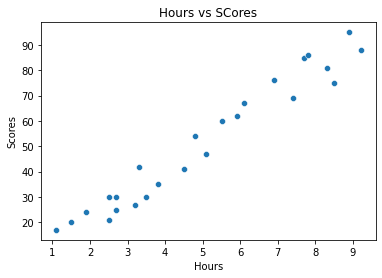

In [11]:
sns.scatterplot(x=std.Hours,y=std.Scores)
plt.title("Hours vs SCores")

From this graph we can see that there is a postitive linear relation between the number of hours studied and percentage of score.

In [12]:
y=np.array(std["Scores"])
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [19]:
x=np.array(std["Hours"]).reshape(-1, 1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Hours vs Scores')

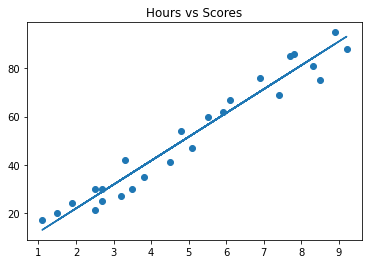

In [33]:
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.title('Hours vs Scores')

## Making Predictions

In [29]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
own_pred = regressor.predict([[9.25]])
print(own_pred[0])

93.69173248737539


No of Hours=9.25

Predicted Score = 93.69173248737539

## Evaluating the model

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
